# Minimum Daily Temperature Time Series Analysis 

## About Project -


the main motive of the TSA is to predict future values based on the past behavior
future values are influenced by past happening. It might be a trend or Seasonality 
or both or cyclic. So I am here depends upon the flow over time I will find out the 
upcoming period observations. 


## Import the Liabraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from statsmodels.tsa.seasonal import seasonal_decompose #checking decomponents of df
from statsmodels.tsa.api import adfuller #checking stationary
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf #mapping
from statsmodels.tsa.statespace.sarimax import SARIMAX #seassonal forecasting
import pmdarima as pm #auto forecasing
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error #errorcheck

import warnings

warnings.filterwarnings('ignore')

## Reading Dataset

In [46]:
df = pd.read_csv("C:\\Users\\Manikanta\\Downloads\\daily-minimum-temperatures-in-me.csv")

In [47]:
df.head() # first 5 rows

,Date,Daily minimum temperatures
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [48]:
df.info() 

#checking d-type of each column inthe dataset 

#here we can see no.of rows and columns, data types are not correct. we should change at data cleaning part

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [49]:
df.isnull().sum() #checking for duplicates

Date                          0
Daily minimum temperatures    0
dtype: int64

## Data Cleaning (Data Wrangling)

1. Removing the Unnecessary columns which are not required for my series analysis

2. Converting the data type, default to meaningful.

In [50]:
df.columns = ['Date','MT'] #i want to change column name because of length of the header.

df.head() #view

,Date,MT
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [51]:
df['Date'] = pd.to_datetime(df['Date']) #coverting into datetime d-type

In [53]:
df['MT'].unique()  #checking the each obseration because it column has string values.

array(['20.7', '17.9', '18.8', '14.6', '15.8', '17.4', '21.8', '20',
       '16.2', '13.3', '16.7', '21.5', '25', '20.6', '24.8', '17.7',
       '15.5', '18.2', '12.1', '14.4', '16', '16.5', '18.7', '19.4',
       '17.2', '15.1', '15.4', '15.3', '21.9', '19.9', '16.6', '16.8',
       '17.1', '15', '13.7', '13.9', '18.3', '22', '22.1', '21.2', '18.4',
       '16.1', '15.7', '18.5', '16.9', '17.5', '17.8', '18.6', '17',
       '14.3', '11.4', '16.3', '11.8', '12.2', '14.7', '11.3', '10.6',
       '11.7', '14.2', '11.2', '8.1', '8', '8.8', '13.4', '10.9', '11',
       '14.5', '18.1', '10', '14.9', '15.9', '13', '7.6', '11.5', '13.5',
       '12.4', '13.2', '13.8', '9', '9.8', '8.9', '7.4', '9.9', '9.3',
       '8.6', '11.9', '14', '12', '10.5', '10.7', '10.1', '5.3', '6.6',
       '8.5', '5.9', '3.2', '2.1', '3.4', '5.4', '9.6', '12.3', '12.6',
       '12.8', '11.6', '5.7', '7.1', '2.5', '3.5', '4.6', '7.7', '10.4',
       '9.2', '6.1', '2.7', '4.3', '6.3', '3.8', '4.4', '4.8', '5.8',
   

In [54]:
df[df['MT'].str.startswith('?')] #filtered the string values in mt column

,Date,MT
565,1982-07-20,?0.2
566,1982-07-21,?0.8
1290,1984-07-14,?0.1


In [56]:
#removing the '?' special character. and converted into float d-type

df['MT'] = df['MT'].str.replace('[\?\,]',"").astype('float')

In [57]:
df.info() #then checking once again the d-type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   MT      3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


## Skewness and Deducting Outliers

Skewness :0.1723


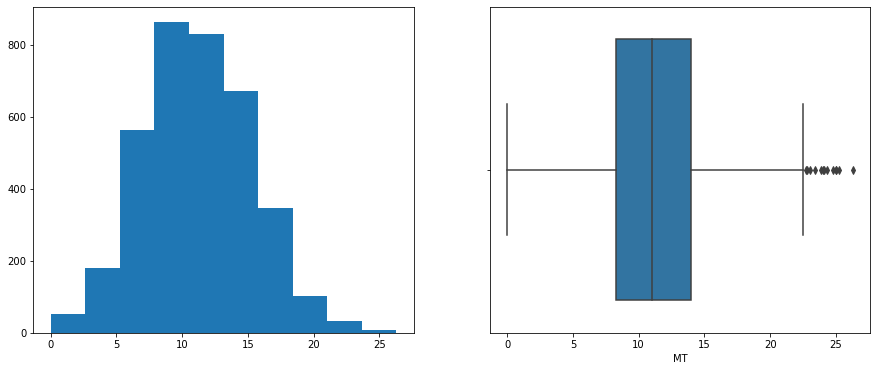

In [80]:
print('Skewness :{:.4f}'.format(df.MT.skew()))
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df.MT.hist(grid=False)
plt.subplot(1,2,2)
sns.boxplot(x=df.MT)

plt.show()

### Observations :

. skewness number is not much higher.

. Through hist-plot, we can see a normal distribution.

. Meanwhile, through boxplots, we can observe a few outliers at the high end.

. with help of standard deviation, we can find those outliers fall under 2nd or 3rd+ sd

# ____

## Time-Series Analysis

In [81]:
  

# for time series analysis we need to put datatime d-type as index of data frame.

df.set_index('Date',inplace=True) 

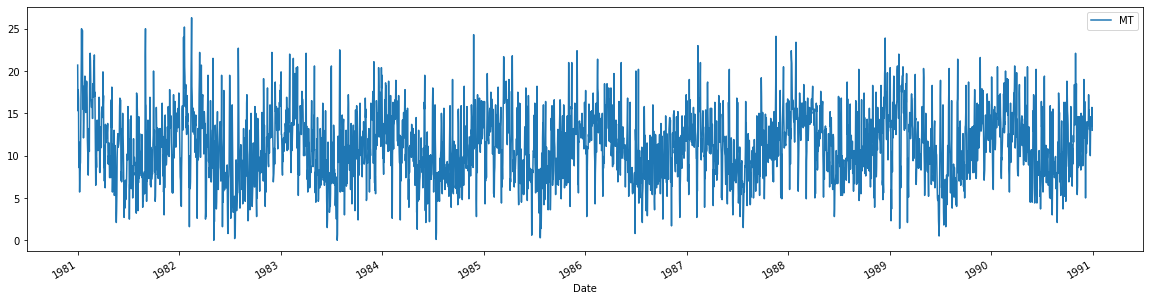

In [82]:


#By using the panda's plot we can observe the behavior of the curve going on over time.

plt.rcParams.update({'figure.figsize':(20,5)}) 

df.plot();

In [84]:
#step-3 Modeling

#     here this is your choice we can forecast hourly daily, monthly, or Quarterly
#     so I want to forecast the values monthly

df = df.resample('m').mean()

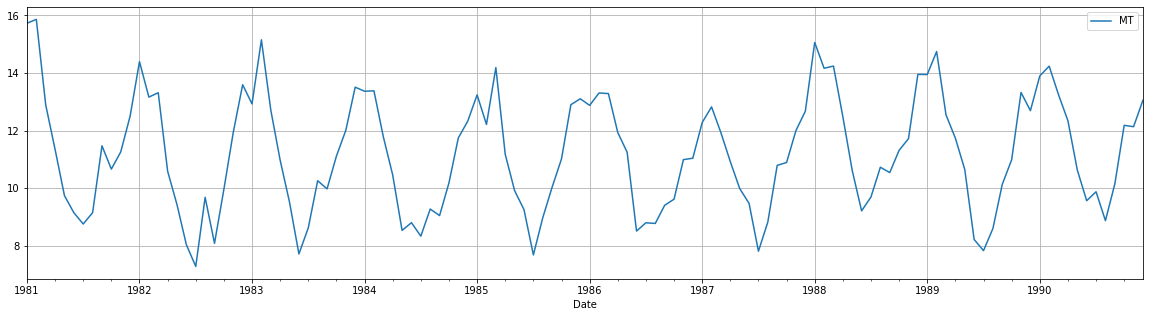

In [87]:

df.plot(grid=True); #see now we can find trend and variance and seasonality easily

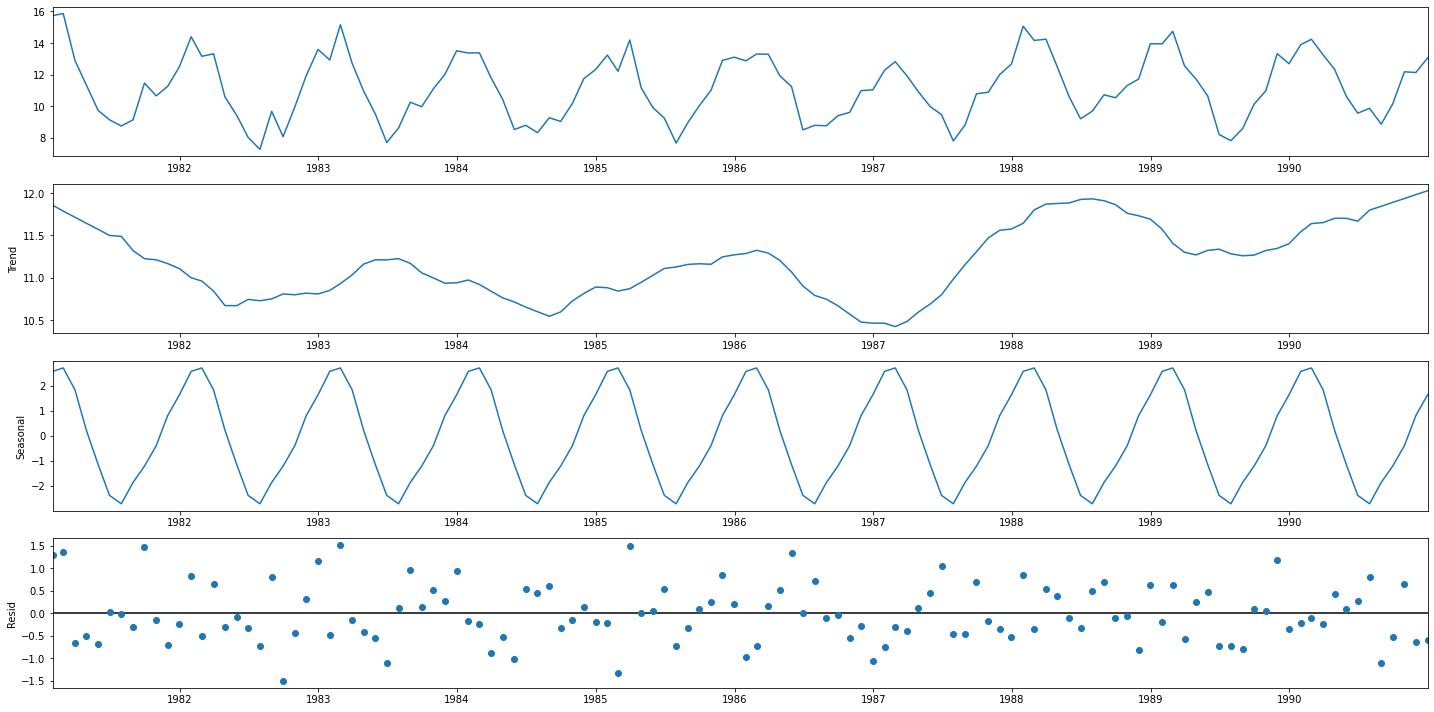

In [108]:


#here by the 

#here with the help of decomponents of df, we can know if df has trend and seasonality

add_m = seasonal_decompose(df,model='addition',extrapolate_trend='freq')

mult_m = seasonal_decompose(df,model='multiplicative',extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize':(20,10)})


add_m.plot();


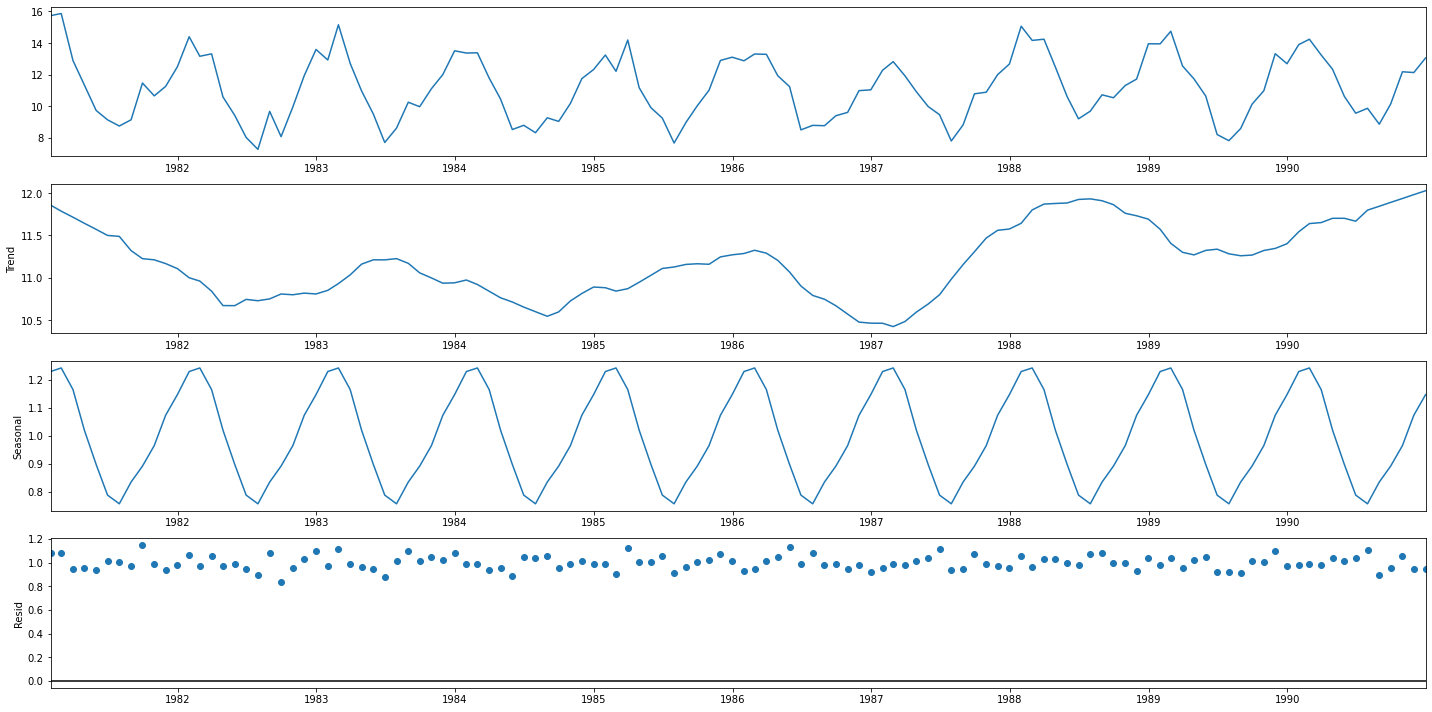

In [110]:
mult_m.plot();

### Observations:

1. we can check both addition and multiplicative types. In both plots, it is appearing
The data frame has seasonality and variance not trend.

2. However, we need to find which type is suitable for the data frame by checking the resid

# ____

Skewness of addition type : 0.3444
Skewness of multiplicative : 0.1849


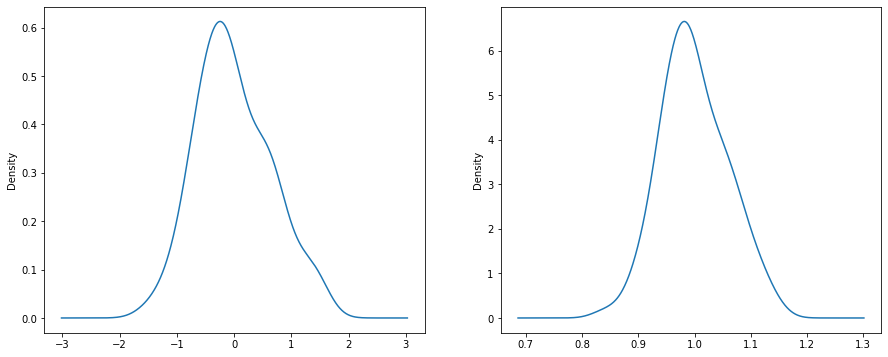

In [113]:
print('Skewness of addition type : {:.4f}'.format(add_m.resid.skew()))
print('Skewness of multiplicative : {:.4f}'.format(mult_m.resid.skew()))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
add_m.resid.plot(kind='kde')
plt.subplot(1,2,2)
mult_m.resid.plot(kind='kde')
plt.show()

#### there we can observe multiplicative model does not have more skewness than another type. and also, density looks pretty well in the multiplicative model


# ____

### Checking Stationarity

#### A time series is stationary if it satisfies the following three conditions.

1. Mean of the series over time is constant
2. Variance of the series over time is constant.
3. No seasonality.

WE can find out with the help of Dickey Fuller test

In [125]:


#without differentiate checking for stationary

t = adfuller(df)  

if t[1] >= 0.05:
    print('\nP_value {:.2f}'.format(t[1]),",", "\nstatus : It is Non-stationary\n")
else:
    print('P_value {:.2f}'.format(t[1]),",", " \nstatus : It is stationary")


P_value 0.43 , 
status : It is Non-stationary



In [133]:
#with 1 differentiate checking for stationary


t2 = adfuller(df.diff().dropna())

diff1 = df.diff().dropna()

if t2[1] >= 0.05:
    print('\nP_value :',t2[1],",", "\nstatus : It is Non-stationary\n")
else:
    print('\nP_value  :',t2[1],",", "\nstatus : It is stationary")


P_value  : 1.3545495930893002e-20 , 
status : It is stationary


## Forecasting

> A.Auto ARIMA

> B.Seasonal ARIMA


### AUTO ARIMA MODEL

In [138]:


plt.rcParams.update({'figure.figsize':(20,5)})


#separating my series into two 
#one for helping with forecasting...
#another one is for checking residuals after come out from model ie., predicted observations

train_data = df.loc[:'1989-12-31']

test_data = df.loc['1990':]

In [136]:


#      auto ARIMA which is the simplest method and the same time complicated too
#      here we need to give the proper inputs to the parameters in the function
#      the final output is the smallest AIC (relational distance between..)

model = pm.auto_arima(df.MT,m=12,seasonal=True,start_P=0,start_q=0,max_order=4,
                     test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=387.081, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=511.022, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=369.949, Time=0.60 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=413.999, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=925.981, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=404.089, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=335.209, Time=0.67 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=386.360, Time=0.19 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=334.966, Time=1.33 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=338.410, Time=1.60 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=335.878, Time=1.39 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=332.957, Time=1.87 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(2, 0, 0)x(2, 0, [1], 12)   Log Likelihood                -159.479
Date:                              Mon, 19 Sep 2022   AIC                            332.957
Time:                                      11:34:49   BIC                            352.470
Sample:                                  01-31-1981   HQIC                           340.881
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1030      0.103      0.999      0.318      -0.099       0.305
ar.L1          0.3345      0.104      3.222      0.001       0.131       0.538
ar.L2          0.2067      0.127      1.632      0.103      -0.041       0.455
ar.S.L12       0.7934      0.162      4.883      0.000       0.475       1.112
ar.S.L24       0.1864      0.154      1.209      0.227      -0.116       0.489
ma.S.L12      -0.6674      0.156     -4.272      0.000      -0.974      -0.361
sigma2         0.6906      0.114      6.050      0.000       0.467       0.914
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.93   Prob(JB):                         0.47
Heteroskedasticity (H):               0.65   Skew:                             0.25
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Observation :

#### With auto ARIMA we can get the autoregression and Model correlation points that are called PACF and ACF. The Auto ARIMA itself works meaningfully.  However It is depending on the parameter values. some times it does work like it gives an irrelative predicted curve it depends on the series to different series. that time we have to make it manually I mean with ARIMA Model.

#### okay. coming to the point, The order is (2,0,0) and Seasonal Order (2,0,1,12) and its AIc is 332 which is a very low value and we require it. except for AR2 and ARS24 remain Ar and Ma got less than a 0.05 value which means good and getting best observations.


# _____

The RMSQ - 0.5873626802579864
 
The MAE - 0.44062848394523835
 
The MAPE - 0.04028293157761456


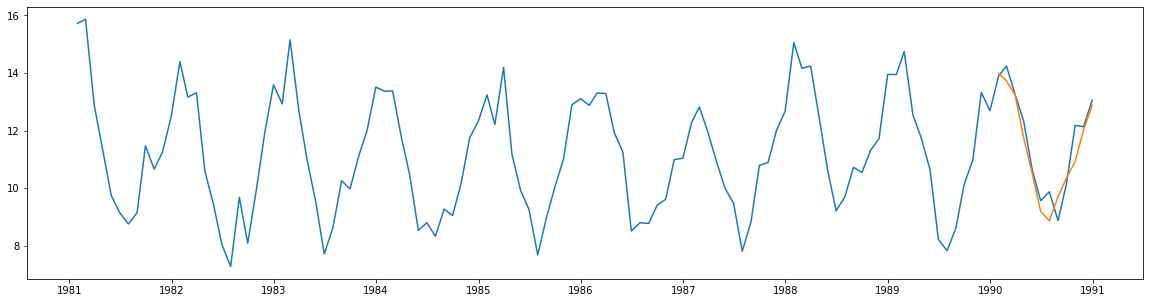

In [139]:
model.fit(train_data)

final = model.predict(n_periods=12,return_conf_int=True)
final_df = pd.DataFrame(final[0],index=test_data.index,columns=['prediction'])


plt.plot(df)
plt.plot(final_df);

print('The RMSQ -',np.sqrt(mean_squared_error(test_data,final_df)))
print(' ')
print('The MAE -', mean_absolute_error(test_data,final_df))
print(' ')
print('The MAPE -',mean_absolute_percentage_error(test_data,final_df))

### Observation


#### It has worked pretty well because see the Root mean square error which is less than 1 but more than > 0.5 however see the plot we got a better turn and but at the left edge side, we predicted a little bit more. 

#### we can observe it. the shape of the test data series has a unique curve compared to past data series curves so that better to do keep the confidence interval.

#### before that, I want to predict again with SARIMA Model.

# _____________________

### Seasaonal ARIMA

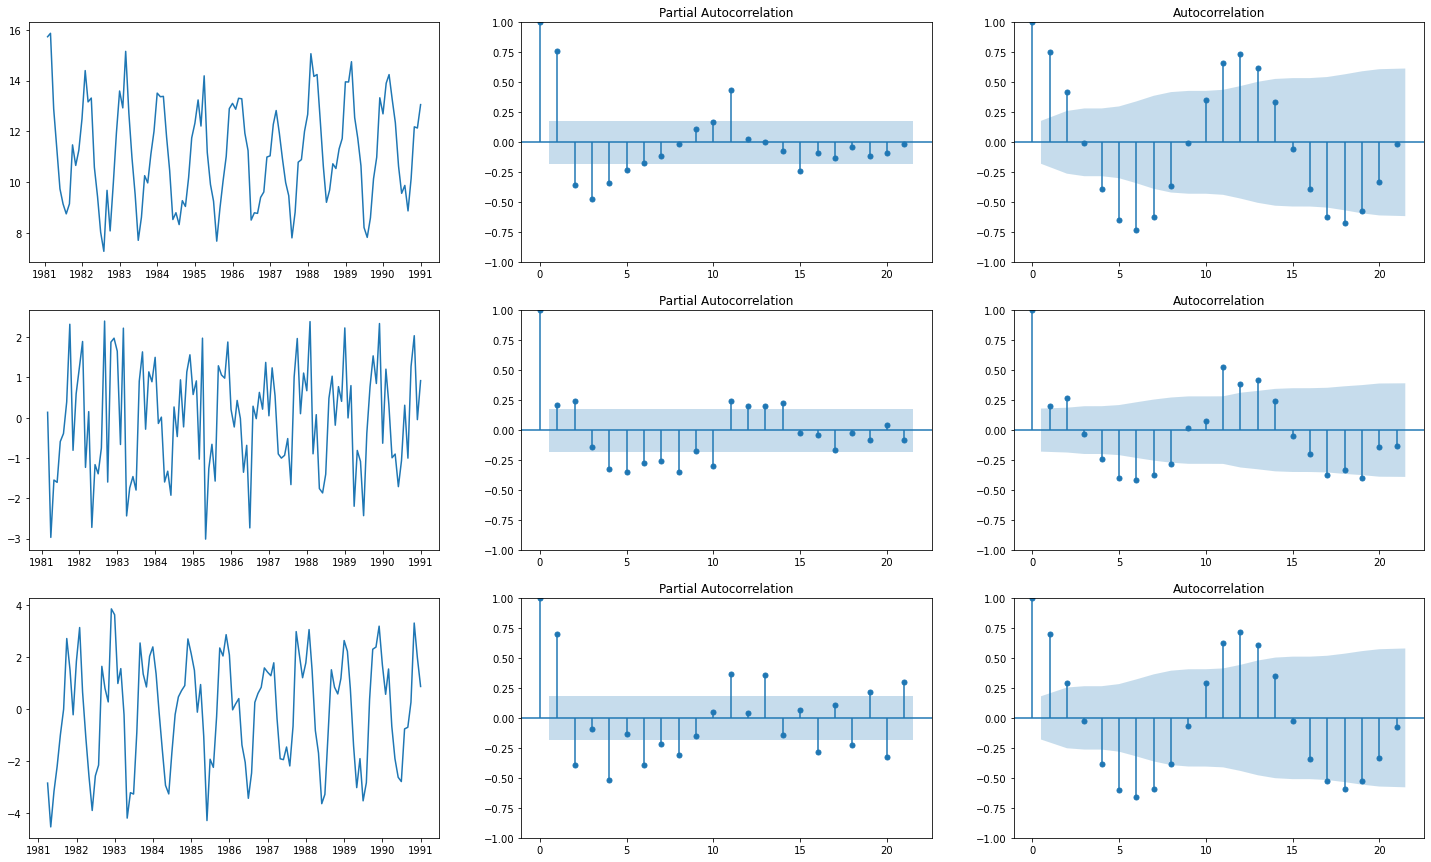

In [140]:
fig,axes=plt.subplots(3,3,figsize=(25,15))

axes[0,0].plot(df)
plot_pacf(df,ax=axes[0,1])
plot_acf(df,ax=axes[0,2])   #without differentiate

axes[1,0].plot(diff1)
plot_pacf(diff1,ax=axes[1,1])  #with 1 differentiate
plot_acf(diff1,ax=axes[1,2])

axes[2,0].plot(df.diff(2).dropna())
plot_pacf(df.diff(2).dropna(),ax=axes[2,1]) #with 2 differentiate
plot_acf(df.diff(2).dropna(),ax=axes[2,2]);


### Explanation :-


Here ACF and PACF plots are useful for choosing the correlation between past values(AR) and Errors(MA). 

We need to differentiate before doing ACF and PACF then it will be made as non-stationary from stationary form. then we can forecast the observations with the help of models.

So coming to the point, here I am keeping the side of the plot side by. because we can understand what different numbers we can get perfect AR and MA values.

2nd row - with 1 differentiate giving proper adequate points and also if we compare with 2 differentiate in ACF chart the lower and upper bound becoming huge and points going towards negative (over differentiate)

so that I have chosen 1st differentiate

AR best in (1,4,11)

MA best in (6,11)

D is 1

# ___


The RMSQ - 0.5172418757530626
 
The MAE - 0.4181963695481876
 
The MAPE - 0.03714992476038525


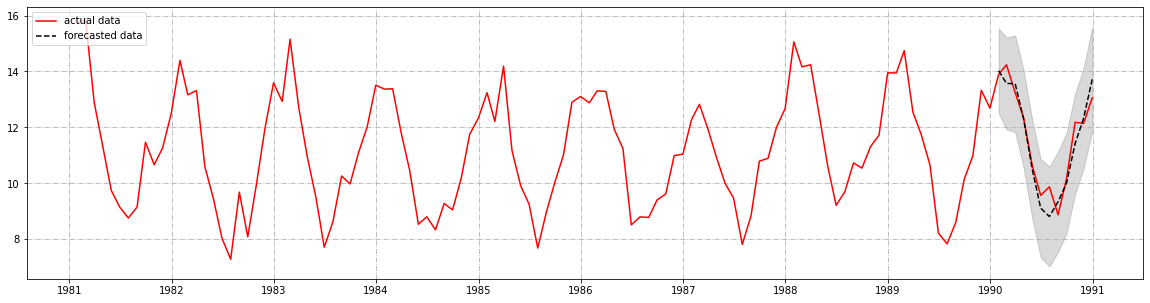

In [142]:
model2 = SARIMAX(train_data,order=(11,1,6),seasonal_order=(0,0,2,12))  #11,1,6,0,0,2,12 #0.517

model2_fit = model2.fit()

n_step = len(test_data)

fs = model2_fit.forecast(n_step,alpha=0.05)

forecast = model2_fit.get_forecast(n_step)

confid_int = forecast.conf_int(alpha=0.05)

fs_df = pd.Series(fs,index=test_data.index)

lower_bound = pd.Series(confid_int['lower MT'],index=test_data.index)

upper_bound =pd.Series(confid_int['upper MT'],index=test_data.index)

plt.plot(df,label='actual data',color='red')
plt.plot(fs_df,label='forecasted data',ls='dashed',color='k')
plt.fill_between(lower_bound.index,lower_bound,upper_bound,color='k',alpha=0.15)
plt.legend(loc=2)
plt.grid(axis='both',ls='dashdot')

print('The RMSQ -',np.sqrt(mean_squared_error(test_data,fs_df)))
print(' ')
print('The MAE -', mean_absolute_error(test_data,fs_df))
print(' ')
print('The MAPE -',mean_absolute_percentage_error(test_data,fs_df))


#r = a_fit.predict(start='1990-01-31',end='1990-12-31',dynamic=True)

### Explanation :-

AR best in (1,4,11) 

MA best in (6,11)

D is 1

I tried all however order(11,1,6) and seasonal(0,0,2,12)
gives a better root mean square error which is smaller than auto ARIMA's root mean square error. along with I kept confidence interval alpha =0.05 which gives
a point estimate with a margin of error I mean in the future we can get the value in between the width of the darker shadow part on the graph.

Results :

Root mean square error of SARIMA :0.517 and AutoARIMA :0.587
  
Mean absolute error of SARIMA :0.418 and AutoARIMA :0.441
 
mean absolute percentage error :0.037 and AutoARIMA :0.040



based on the model now can find further future values with confidence intervals.

# ____

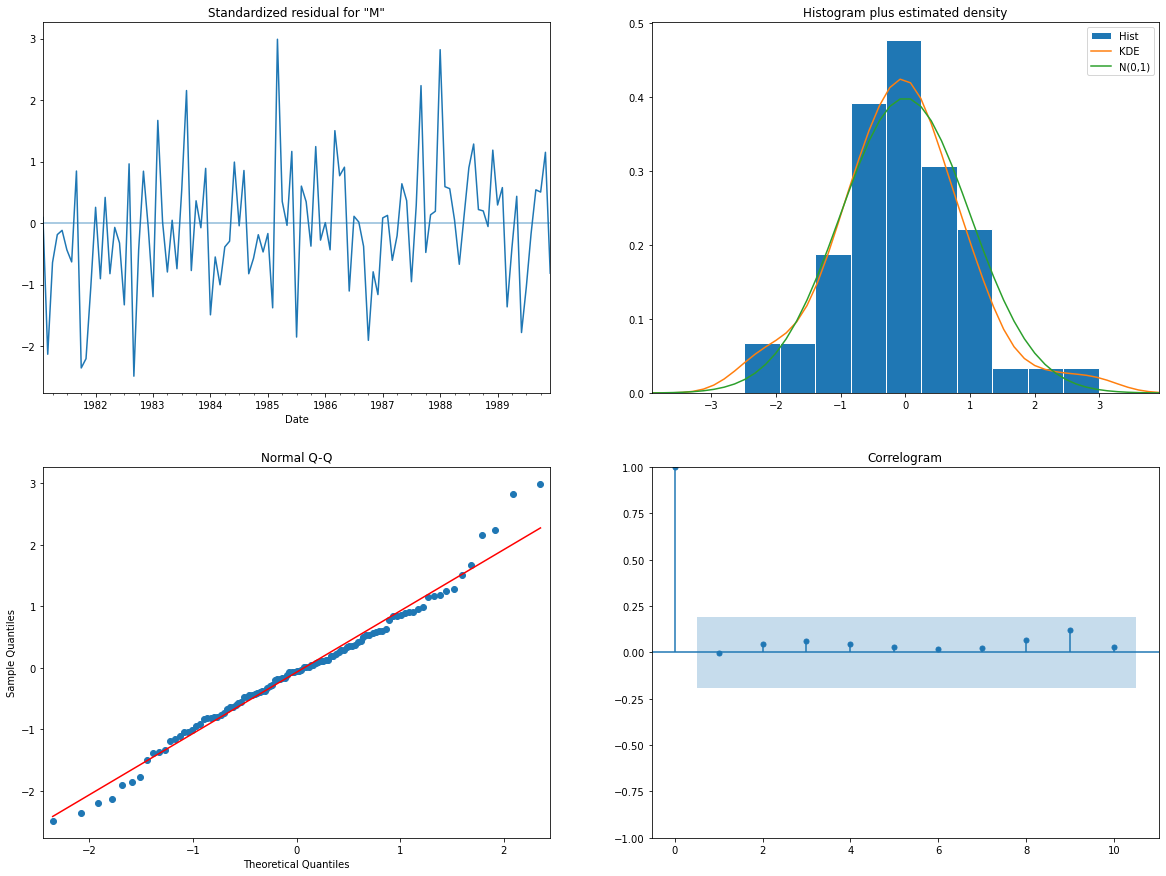

In [143]:
#indepth insights About the our model

plt.rcParams.update({'figure.figsize':(20,15)})

model2_fit.plot_diagnostics();

In [166]:
print('Root mean square error of SARIMA :{:.3f} and AutoARIMA :{:.3f}' .format(np.sqrt(mean_squared_error(test_data,fs_df)),np.sqrt(mean_squared_error(test_data,final_df))))
print('  ')
print('Mean absolute error of SARIMA :{:.3f} and AutoARIMA :{:.3f}'.format(mean_absolute_error(test_data,fs_df),mean_absolute_error(test_data,final_df)))
print(' ')
print('mean absolute percentage error :{:.3f} and AutoARIMA :{:.3f}'.format(mean_absolute_percentage_error(test_data,fs_df),mean_absolute_percentage_error(test_data,final_df)))

Root mean square error of SARIMA :0.517 and AutoARIMA :0.587
  
Mean absolute error of SARIMA :0.418 and AutoARIMA :0.441
 
mean absolute percentage error :0.037 and AutoARIMA :0.040


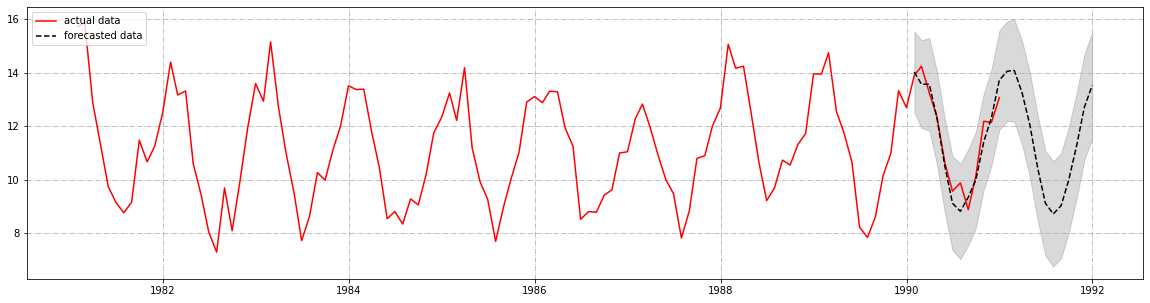

In [145]:
plt.rcParams.update({'figure.figsize':(20,5)})


model2 = SARIMAX(train_data,order=(11,1,6),seasonal_order=(0,0,2,12))  #11,1,6,0,0,2,12 #0.517

model2_fit = model2.fit()

index = pd.date_range(start='1990-01-31',periods=24,freq='M')

n_step = len(index)

fs1 = model2_fit.forecast(n_step,alpha=0.05)

forecast1 = model2_fit.get_forecast(n_step)

confid_int1 = forecast1.conf_int(alpha=0.05)

fs_df1 = pd.Series(fs1,index=index)

lower_bound1 = pd.Series(confid_int1['lower MT'],index=index)

upper_bound1 =pd.Series(confid_int1['upper MT'],index=index)

plt.plot(df,label='actual data',color='red')
plt.plot(fs_df1,label='forecasted data',ls='dashed',color='k')
plt.fill_between(lower_bound1.index,lower_bound1,upper_bound1,color='k',alpha=0.15)
plt.legend(loc=2)
plt.grid(axis='both',ls='dashdot')


## Conclusion

### Finally, we could forecast the future values meaning fully( RMSE) Gemerally, we can predict all kinds of series. however past circles play a vital role for forecasting. we are depending on the past transaction then we can predict it.
### But sometimes like huge falls down and raises behavior in the series that time it will be complicated to forecast. that time we can consider like an extreme behavior.
### me.. that time I  treat as  a "single time happened" I will remove the single fluctuation. and replace with the mean value of remaining observations. I don't say it is perfect because that huge peak or extreme behavior might influence future values. that is it might be above flow or below avg flow...